# Supervised vs Unsupervised Learning
## Objective: 
1) Unsupervised Learning: Compare the implementation and visualisation techniques between PCA with, and without Feature Scaling. Analyse the impacts on the accuracy of the respective regression/classification models.

2) Supervised Learning: Apply another features extraction technique called LDA. Analyse the impact on the accuracy of the respective regression/classification models. 

3) Unsupervised Learning: Apply Kernal PCA to the same dataset, compare the results with 1) and 2) above.  

Scenario: To support a wine business owner analysing her wine business, by extracting the top 2 principle components. Allowing the business owner to map and plan ahead of current and future services.

### Dataset: 
Matrix of Features: 180 x 14

Wine.csv

#### Machine Learning Methods Applied: 
1) PCA - Unsupervised Learning: Principle Components Analysis 

2) LDA - Supervised Learning: Linear Discriminant Analysis

3) Kernal PCA - Unsupervised Learning: Kernal Principle Components Analysis 

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values # only need columns 0 'to' 12
Y = dataset.iloc[:, 13].values # column 13
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## 1) Unsupervised Learning: PCA

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0) 

### PCA with no Feature Scaling vs PCA with Feature Scaling

Standardisation also known as Z-score normalisation. The resulting features are rescaled so that they are centred around 0 (mean = 0) with a standard deviation of 1. This is important because when comparing features in different units, certain feature values affect the weight updates. Although it is worth noting that most regression library already supports scaling by default. 

PCA is calculated from the covariance matrix. PCs are the eigenvectors of the covariance matrix. Larger the eigenvalue, the more important it is for the corresponding eigenvector.  

In [4]:
from sklearn.decomposition import PCA
# PCA on non-standardized (non-scaled) data
pca = PCA(n_components=2).fit(X_train)
X_train_no_scale = pca.transform(X_train)
X_test_no_scale = pca.transform(X_test)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler ()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# PCA on standardized (scaled) data
pca = PCA(n_components=2).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

## 1a) Visualise and Compare Scaling Effects

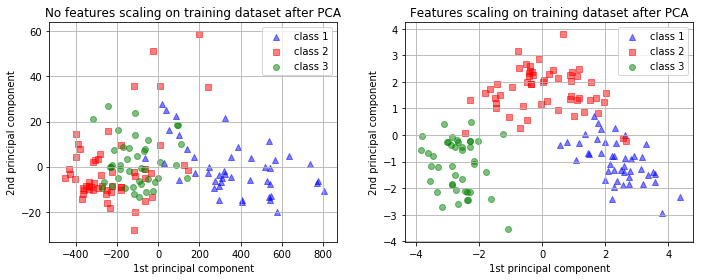

In [5]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))


for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train_no_scale[Y_train==l, 0], X_train_no_scale[Y_train==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train[Y_train==l, 0], X_train[Y_train==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

ax1.set_title('No features scaling on training dataset after PCA')    
ax2.set_title('Features scaling on training dataset after PCA')    

for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()

plt.show()  

## 1b) Apply Logistic Regression to the new Feature Space with Scaling

In [6]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 1c) Result: Logistic Regression with feature scaled PCA

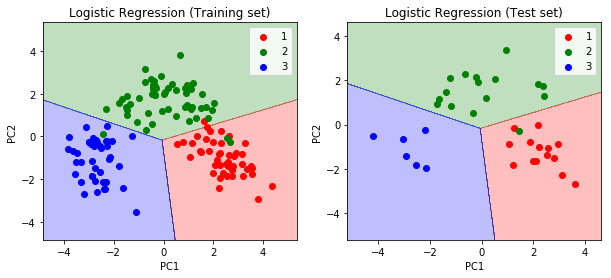

In [7]:
# Visualising the Training set results
# -1 and + 1 (apply to x-axis and y-axis respectively) is to lift the result, so that the results not to fall on the edge of the graph 
# X1 = PC1, X2 = PC2 
from matplotlib.colors import ListedColormap
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01))
# use classifier to predict the region, look at each pixel point in turn, classify them to X1 or X2 respectively  
ax1.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
                                                 alpha = 0.25, cmap = ListedColormap(('red','green','blue')))
ax1.set_xlim(X1.min(), X1.max())
ax1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red','green','blue'))(i), label = j)
ax1.set_title('Logistic Regression (Training set)')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.legend()
   
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01))
ax2.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
                                                 alpha = 0.25, cmap = ListedColormap(('red','green','blue')))
ax2.set_xlim(X1.min(), X1.max())
ax2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red','green','blue'))(i), label = j)
ax2.set_title('Logistic Regression (Test set)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.legend()
plt.show()     

In [8]:
# Predicting the Training set results
y_pred_train = classifier.predict(X_train)  

# Predicting the Test set results
y_pred_test = classifier.predict(X_test) 

In [9]:
from sklearn import metrics
print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(Y_train, y_pred_train)))
print('\nConfusion matrix for the training dataset')
print('{:}'.format(metrics.confusion_matrix(Y_train, y_pred_train)))
print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(Y_test, y_pred_test))) 
print('\nConfusion matrix for the test dataset')
print('{:}'.format(metrics.confusion_matrix(Y_test, y_pred_test)))


Prediction accuracy for the training dataset
96.48%

Confusion matrix for the training dataset
[[43  2  0]
 [ 2 52  1]
 [ 0  0 42]]

Prediction accuracy for the test dataset
97.22%


Confusion matrix for the test dataset
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


In [22]:
print('\nPC1,PC2: Principle axes in feature space')    
print(pd.DataFrame(pca.components_, index = ['PC-1','PC-2'], columns = dataset.columns[0:13]))   
print('\nThe amount of variance explained by the largest eigenvalues of the covariance matrix of X(first two components):\n%s'% str(pca.explained_variance_ratio_))


PC1,PC2: Principle axes in feature space
       Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
PC-1  0.129600   -0.244641 -0.010189     -0.240516   0.126495       0.389441   
PC-2 -0.498073   -0.231685 -0.314969      0.023218  -0.258420      -0.100685   

      Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
PC-1    0.427578             -0.305057         0.307753        -0.110272   
PC-2   -0.020980             -0.039906        -0.067460        -0.530871   

           Hue     OD280   Proline  
PC-1  0.307105  0.376362  0.281109  
PC-2  0.271617  0.160712 -0.365473  

The amount of variance explained by the largest eigenvalues of the covariance matrix of X(first two components):
[ 0.36884109  0.19318394]


## 2) Supervised Learning: LDA 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0) 

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler ()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train,Y_train)
X_test = lda.transform(X_test)

## 2a) Apply Logistic Regression to the new Feature Space with Scaling

In [13]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 2b) Result: Logistic Regression with feature scaled LDA

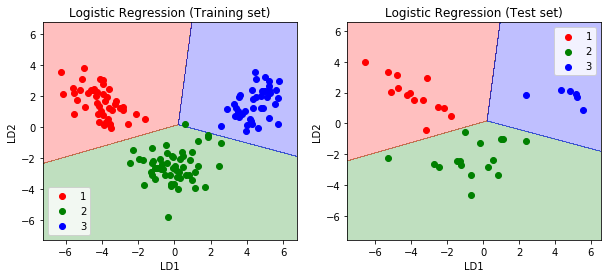

In [14]:
# Visualising the Training set results
# -1 and + 1 (apply to x-axis and y-axis respectively) is to lift the result, so that the results not to fall on the edge of the graph 
# X1 = PC1, X2 = PC2 
from matplotlib.colors import ListedColormap
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01))
# use classifier to predict the region, look at each pixel point in turn, classify them to X1 or X2 respectively  
ax1.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
                                                 alpha = 0.25, cmap = ListedColormap(('red','green','blue')))
ax1.set_xlim(X1.min(), X1.max())
ax1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red','green','blue'))(i), label = j)
ax1.set_title('Logistic Regression (Training set)')
ax1.set_xlabel('LD1')
ax1.set_ylabel('LD2')
ax1.legend()
   
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01))
ax2.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
                                                 alpha = 0.25, cmap = ListedColormap(('red','green','blue')))
ax2.set_xlim(X1.min(), X1.max())
ax2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red','green','blue'))(i), label = j)
ax2.set_title('Logistic Regression (Test set)')
ax2.set_xlabel('LD1')
ax2.set_ylabel('LD2')
ax2.legend()
plt.show()     

In [15]:
# Predicting the Training set results
y_pred_train = classifier.predict(X_train)  

# Predicting the Test set results
y_pred_test = classifier.predict(X_test) 

In [16]:
from sklearn import metrics
print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(Y_train, y_pred_train)))
print('\nConfusion matrix for the training dataset')
print('{:}'.format(metrics.confusion_matrix(Y_train, y_pred_train)))
print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(Y_test, y_pred_test))) 
print('\nConfusion matrix for the test dataset')
print('{:}'.format(metrics.confusion_matrix(Y_test, y_pred_test)))


Prediction accuracy for the training dataset
99.30%

Confusion matrix for the training dataset
[[45  0  0]
 [ 0 54  1]
 [ 0  0 42]]

Prediction accuracy for the test dataset
100.00%


Confusion matrix for the test dataset
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


## 3) Unsupervised Learning: Kernal PCA 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0) 

In [25]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler ()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf') # extracting principle components
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

## 3a) Apply Logistic Regression to the new Feature Space with Scaling

In [26]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 3b) Result: Logistic Regression with feature scaled Kernal PCA

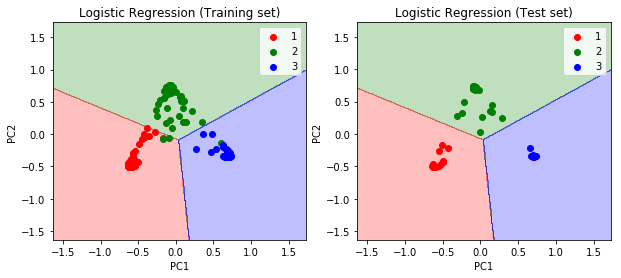

In [28]:
# Visualising the Training set results
# -1 and + 1 (apply to x-axis and y-axis respectively) is to lift the result, so that the results not to fall on the edge of the graph 
# X1 = PC1, X2 = PC2 
from matplotlib.colors import ListedColormap
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01))
# use classifier to predict the region, look at each pixel point in turn, classify them to X1 or X2 respectively  
ax1.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
                                                 alpha = 0.25, cmap = ListedColormap(('red','green','blue')))
ax1.set_xlim(X1.min(), X1.max())
ax1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red','green','blue'))(i), label = j)
ax1.set_title('Logistic Regression (Training set)')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.legend()
   
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01))
ax2.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
                                                 alpha = 0.25, cmap = ListedColormap(('red','green','blue')))
ax2.set_xlim(X1.min(), X1.max())
ax2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red','green','blue'))(i), label = j)
ax2.set_title('Logistic Regression (Test set)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.legend()
plt.show()    

In [29]:
# Predicting the Training set results
y_pred_train = classifier.predict(X_train)  

# Predicting the Test set results
y_pred_test = classifier.predict(X_test) 

In [30]:
from sklearn import metrics
print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(Y_train, y_pred_train)))
print('\nConfusion matrix for the training dataset')
print('{:}'.format(metrics.confusion_matrix(Y_train, y_pred_train)))
print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(Y_test, y_pred_test))) 
print('\nConfusion matrix for the test dataset')
print('{:}'.format(metrics.confusion_matrix(Y_test, y_pred_test)))


Prediction accuracy for the training dataset
97.89%

Confusion matrix for the training dataset
[[45  0  0]
 [ 2 52  1]
 [ 0  0 42]]

Prediction accuracy for the test dataset
100.00%


Confusion matrix for the test dataset
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
